### `Time-Series Forecasting`: Predicting `stock prices` based upon [`Yahou Finance Data`](https://finance.yahoo.com/quote/TSLA/history?period1=1436486400&period2=1594339200&interval=1d&filter=history&frequency=1d&guccounter=1&guce_referrer=aHR0cHM6Ly90b3dhcmRzZGF0YXNjaWVuY2UuY29tL3RpbWUtc2VyaWVzLWZvcmVjYXN0aW5nLXByZWRpY3Rpbmctc3RvY2stcHJpY2VzLXVzaW5nLWFuLWFyaW1hLW1vZGVsLTJlM2IzMDgwYmQ3MA&guce_referrer_sig=AQAAAG-n1bPM65HRPNtfvTtFOlCasinWwD0ebbyeWMHdYBwgeE8amlj0LwLvKgmAmrwSFePXDFDWHnRRXiEiAeSubV5pLQ1_sDSWwp8Dpz2DY9KSiLLKRZdbZ2jrItUJsiW5UNfScdF00Kd9WGTDaQ31il3siaw5nfb6i7mCs0M_0nan) of Tesla, Inc. (TSLA) NasdaqGS - NasdaqGS Real Time Price. Currency in USD

* done by:

    [`Ismail Ouahbi`](https://www.linkedin.com/in/ismail-ouahbi-071145207/)
    
    [`Hamza Khalid`](https://www.linkedin.com/in/hamza-khalid-a0bb401ba/)
    
    date: 23/12/22

### What to know before diving deep?

#### Time series data:

`Time series data` is a sequence of data points that are collected at regular intervals over a period of time. These data points are typically collected at a fixed time interval, such as every minute, hour, day, or month. Time series data is often used to analyze trends and patterns over time, such as changes in stock prices, weather patterns, or website traffic. It is often used in fields such as finance, economics, and meteorology.


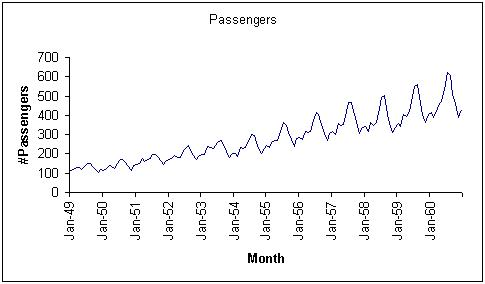

#### Time series forecasting:

`Time series forecasting` is the process of using historical data to make predictions about future events. It is a common technique that is used in a wide variety of fields, including finance, economics, and meteorology, to name a few. There are many reasons why time series forecasting is useful:

* 1: Understanding trends and patterns: Time series forecasting can help you understand how a particular metric or variable changes over time, which can be useful for identifying trends and patterns. This can be helpful for making informed decisions about the future.

* 2: Making predictions: Time series forecasting allows you to make predictions about future events based on past data. This can be useful for predicting future demand for a product, forecasting sales revenue, or predicting future weather patterns.

* [source](https://chat.openai.com/)


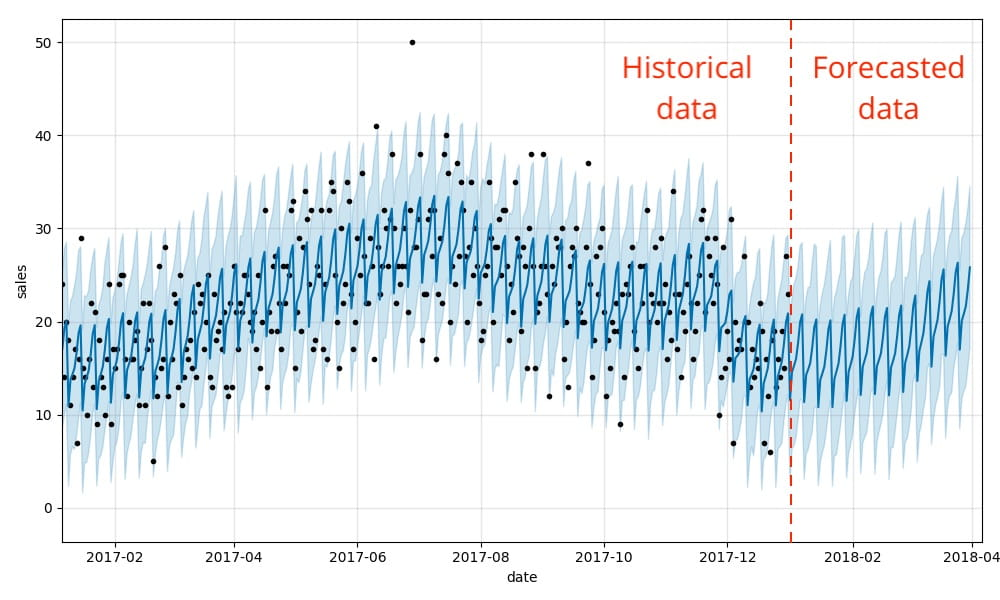

# The Main Goal: 

##### In this lab, we are going to use different Machine Learning models from the sckit-learn library to predict Tesla’s stock prices in the future.

In [1]:
### Import libraries

# for Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

# for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.preprocessing.sequence import TimeseriesGenerator

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [40]:
## Load data

data = pd.read_csv('data/TSLA.csv')

# EDA: exploratory data analysis

In [4]:
# first 5 records of data

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-23,2.084000,2.165333,1.994667,2.006000,2.006000,23289000
1,2010-12-27,1.868000,1.905333,1.670667,1.703333,1.703333,139528500
2,2010-12-28,1.723333,1.783333,1.666667,1.760667,1.760667,60844500
3,2010-12-29,1.802000,1.867333,1.766667,1.848667,1.848667,49788000
4,2010-12-30,1.846667,1.860000,1.758667,1.766667,1.766667,30616500


## explain each attribute:

`Date`: This attribute represents the date on which the stock price data is recorded. It is often displayed in a specific format, such as "YYYY-MM-DD" (year-month-day).

`Open`: This attribute refers to the price at which a stock first trades on a given day. It is the starting point for the stock's price movement on that day.

`High`: This attribute represents the highest price that a stock reached on a given day.

`Low`: This attribute represents the lowest price that a stock reached on a given day.

`Close`: This attribute represents the price at which a stock last trades on a given day. It is the final price for the stock on that day.

`Adj Close`: This attribute is similar to the close price, but it takes into account any corporate actions that may have occurred, such as stock splits or dividends. The adjusted close price is often used to compare stock prices over time, as it reflects the actual price of the stock, rather than the price affected by corporate actions.

`Volume`: This attribute refers to the number of shares of a stock that are traded in a given period of time, usually a day. High volume can indicate increased interest in a stock, while low volume may indicate a lack of interest.

In [41]:
## data shape

print("There are",data.shape[0], "rows and", data.shape[1], "columns")

There are 3021 rows and 7 columns


In [6]:
## informations about each feature (column)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3021 non-null   object 
 1   Open       3021 non-null   float64
 2   High       3021 non-null   float64
 3   Low        3021 non-null   float64
 4   Close      3021 non-null   float64
 5   Adj Close  3021 non-null   float64
 6   Volume     3021 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 165.3+ KB


* No null values
* The Date column has an `object` type

In [42]:
## convert the Date attribute from 'object' type to 'datetime'

data['Date'] = pd.to_datetime(data['Date'])
# set Date as dataframe index
data.set_index('Date', inplace=True)

In [43]:
## check

data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-23,2.084000,2.165333,1.994667,2.006000,2.006000,23289000
2010-12-27,1.868000,1.905333,1.670667,1.703333,1.703333,139528500
2010-12-28,1.723333,1.783333,1.666667,1.760667,1.760667,60844500
2010-12-29,1.802000,1.867333,1.766667,1.848667,1.848667,49788000
2010-12-30,1.846667,1.860000,1.758667,1.766667,1.766667,30616500


In [44]:
## descriptive statistics about data

data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000,3.021000e+03
mean,61.113699,62.478231,59.602256,61.059985,61.059985,9.635723e+07
std,96.930186,99.155644,94.412619,96.796200,96.796200,8.163242e+07
min,1.452000,1.484667,1.407333,1.455333,1.455333,3.594000e+06
25%,11.380000,11.633333,11.074000,11.374667,11.374667,4.683000e+07
50%,16.562000,16.805332,16.364000,16.565332,16.565332,7.798950e+07
75%,27.000000,28.086000,26.433332,27.646667,27.646667,1.191318e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


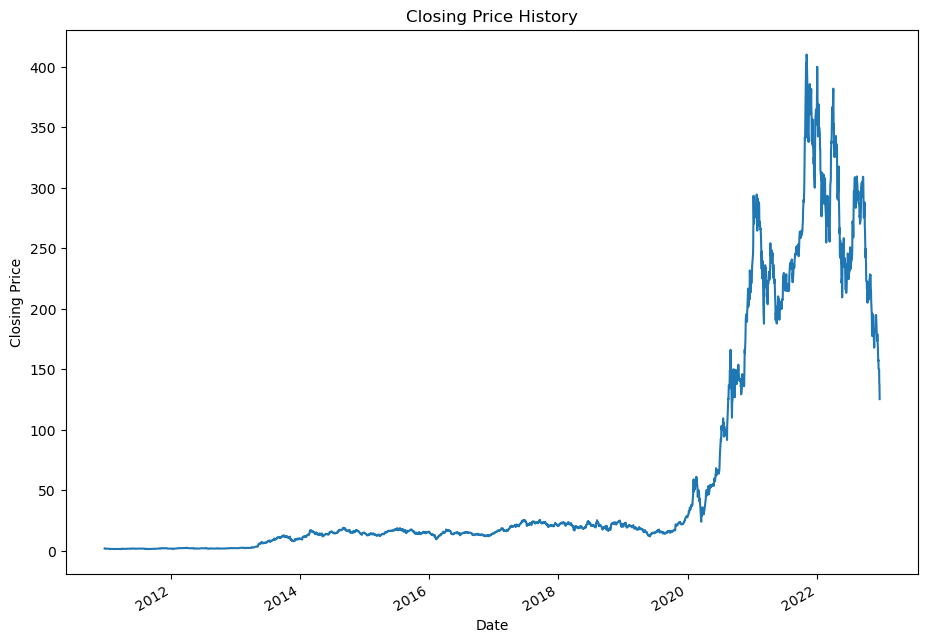

In [10]:
## visualise the Adjusted Close 
## [ Note that The adjusted close price is often used to compare stock prices over time, 
## as it reflects the actual price of the stock, rather than the price affected by corporate actions.]

plt.figure(figsize=(11, 8)) # resizing the plot
data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

* From the beginning of 2020, important increasings had place

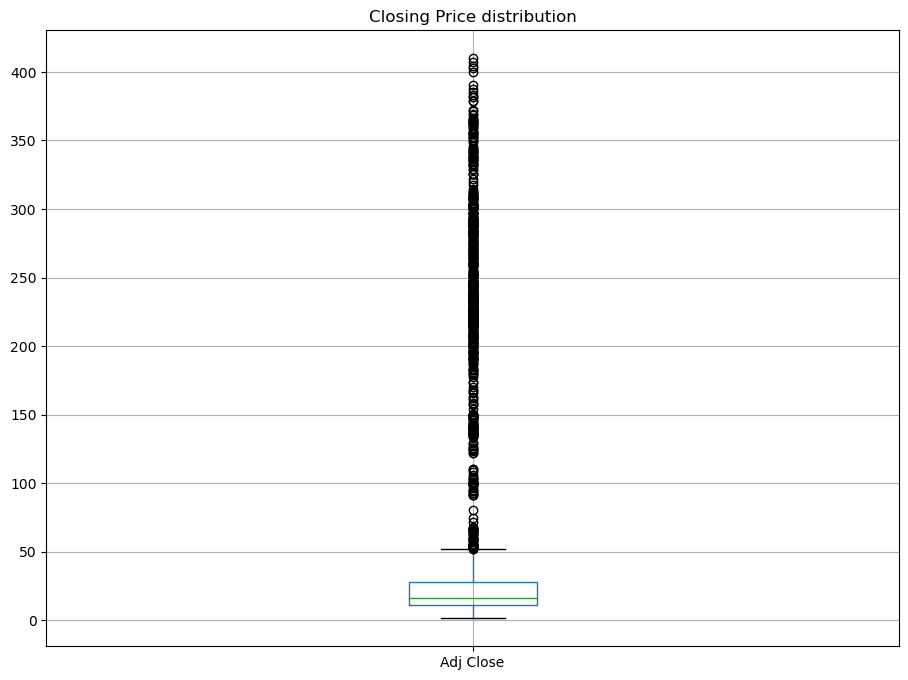

In [118]:
## boxplot of Adj Close column

plt.figure(figsize=(11, 8)) # resizing the plot
data.boxplot(column=['Adj Close'])
plt.title('Closing Price distribution') # adding a title
plt.show()

* Above the 50 score from the beginning of 2020 those values were treated as outliers due to the actual price from 2018 to 2019 that had a value between 0 and 50.

<Figure size 1600x800 with 0 Axes>

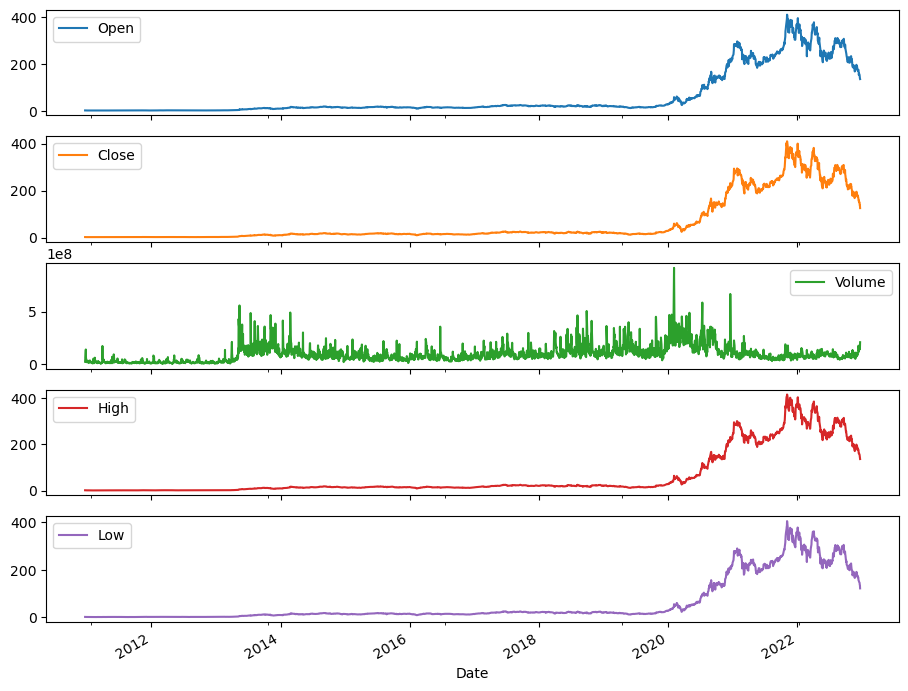

In [119]:
## plot the other columns over time

plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

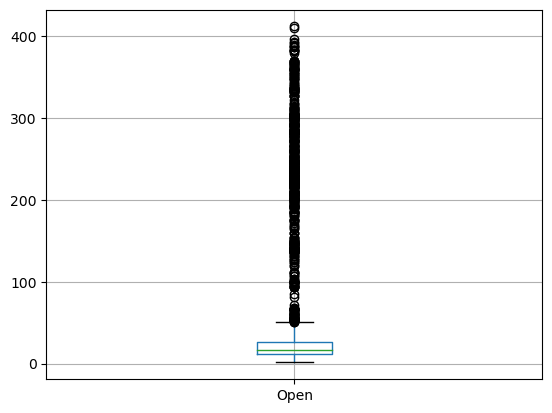

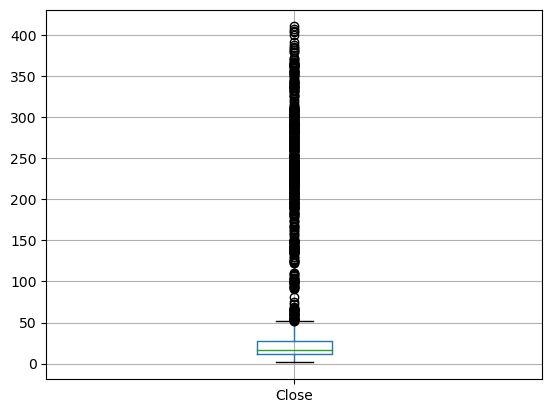

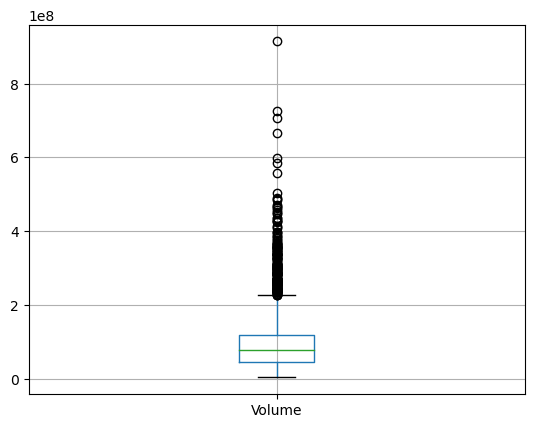

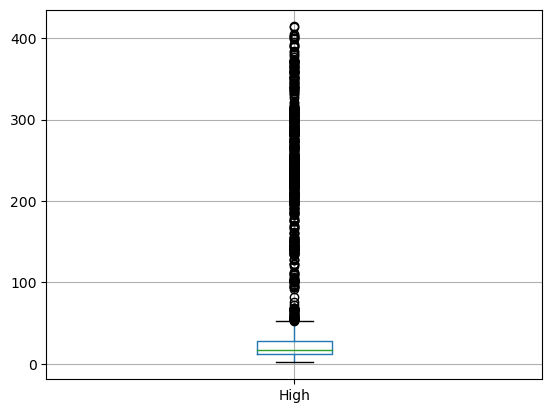

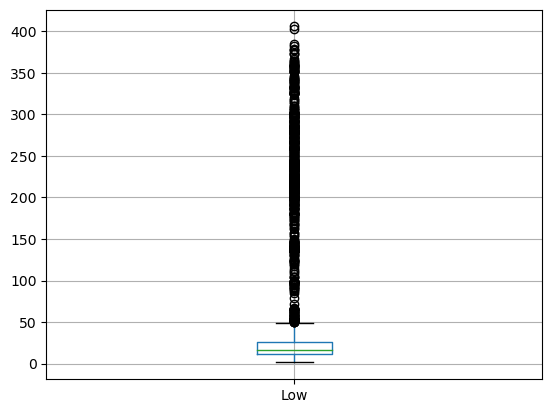

In [45]:
## plot the distribution of the remaining columns

cols = ['Open', 'Close', 'Volume', 'High', 'Low']
for i in cols:
 plt.subplots()
 axes = data.boxplot(column= [i])
plt.show()

<AxesSubplot:>

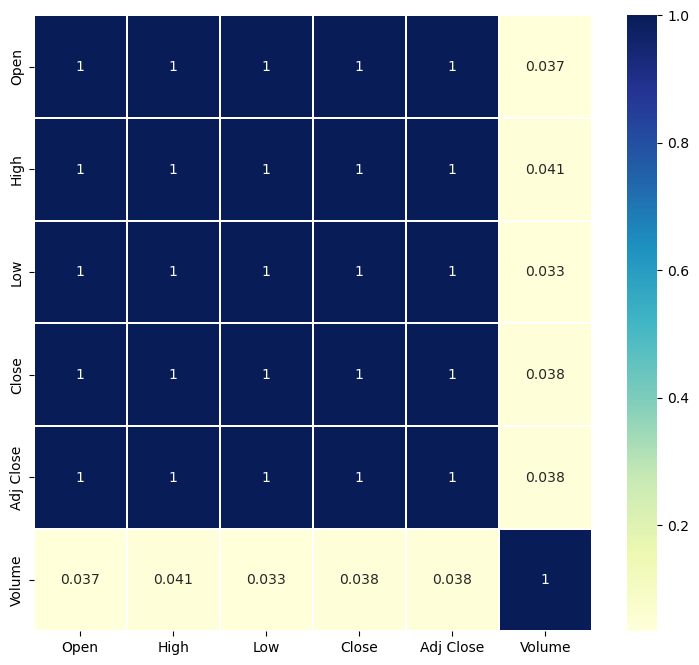

In [11]:
## correlation between features

# get the correlation matrix

corrmat = data.corr()
  
# plot it
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot= True)

* From the above plot, we conclude that `Adj.Close`, `Open`, `High`, `Close` and `Low` have a `very high correlation`.

# PREPROCESSING

In [46]:
## Adding new features to the dataset 
## (from the above correlation matrix we've seen that some columns are just redundant because of the same information they give)
## so that we need to add more informations to our data in order to reinforce the features set

## HL_PCT calculates the high-low percentage for each day
data['HL_PCT'] = ((data['High'] - data['Low']) / data['Low']) * 100.0


## PCT_change calculates the open-close percentage for each day.
data['PCT_change'] = ((data['Close'] - data['Open']) / data['Open']) * 100.0

In [47]:
## verify
data.head()

,Open,High,Low,Close,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,,,,,
2010-12-23,2.084000,2.165333,1.994667,2.006000,2.006000,23289000,8.556115,-3.742802
2010-12-27,1.868000,1.905333,1.670667,1.703333,1.703333,139528500,14.046246,-8.815150
2010-12-28,1.723333,1.783333,1.666667,1.760667,1.760667,60844500,6.999959,2.166383
2010-12-29,1.802000,1.867333,1.766667,1.848667,1.848667,49788000,5.698074,2.589734
2010-12-30,1.846667,1.860000,1.758667,1.766667,1.766667,30616500,5.761921,-4.332129


In [48]:
## check for null values

print('there are',data.isnull().sum().sum(),'null value')

there are 0 null value


# Modeling part

## In this lab we are going to forecast the Adj.close using 2 ML algorithms:
* Ridge Regressor
* RandomForest Regressor

In [56]:
data

,Open,High,Low,Close,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,,,,,
2010-12-23,2.084000,2.165333,1.994667,2.006000,2.006000,23289000,8.556115,-3.742802
2010-12-27,1.868000,1.905333,1.670667,1.703333,1.703333,139528500,14.046246,-8.815150
2010-12-28,1.723333,1.783333,1.666667,1.760667,1.760667,60844500,6.999959,2.166383
2010-12-29,1.802000,1.867333,1.766667,1.848667,1.848667,49788000,5.698074,2.589734
2010-12-30,1.846667,1.860000,1.758667,1.766667,1.766667,30616500,5.761921,-4.332129
...,...,...,...,...,...,...,...,...
2022-12-16,159.639999,160.990005,150.039993,150.229996,150.229996,138459600,7.298062,-5.894515
2022-12-19,154.000000,155.250000,145.820007,149.869995,149.869995,139390600,6.466872,-2.681821
2022-12-20,146.050003,148.470001,137.660004,137.800003,137.800003,159563300,7.852678,-5.648750


In [135]:
### Split target and features

X = data.drop(['Adj Close','Close'], axis=1)

y = data['Adj Close'].values

In [60]:
# import libraries


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [137]:
## before applying our algorithms we need to make sure that data has similar scale

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X) 

In [138]:
## Train Test split

# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
## verify

print('Train data size')
print('X_train', X_train.shape, 'y-train', y_train.shape)

print('Test data size')
print('X_train', X_test.shape, 'y-test', y_test.shape)

Train data size
X_train (2416, 6) y-train (2416,)
Test data size
X_train (605, 6) y-test (605,)


## let's run our models

### RandomForest

In [140]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [141]:
## the confidence here will be the r2_metric
print("the confidence has a value of",rf_confidence)

the confidence has a value of 0.9996942607255418


In [142]:
print('the root mean squared error is',np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

the root mean squared error is 1.7516543080087483


### Ridge

In [143]:
rg = Ridge()
rg.fit(X_train, y_train)
rg_confidence = rg.score(X_test, y_test)

In [144]:
print("the confidence has a value of",rg_confidence)

the confidence has a value of 0.999474372984506


In [145]:
print('the root mean squared error is',np.sqrt(mean_squared_error(y_test, rg.predict(X_test))))

the root mean squared error is 2.2967388962513327


* As we can see, the score is very low.

### LSTM

In [147]:
# Generate timeseries on the basis of past 60 days
n_past = 60
batch_size = 20
num_feature = 6
train_generator = TimeseriesGenerator(X_train, y_train, length= n_past, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator (X_test, y_test, length = n_past, sampling_rate=1, batch_size=batch_size)

In [148]:
model = Sequential()
model.add(LSTM(500, activation = 'tanh' , input_shape=(n_past, num_feature), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(400,  return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(200,  return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 500)           1014000   
                                                                 
 dropout_9 (Dropout)         (None, 60, 500)           0         
                                                                 
 lstm_13 (LSTM)              (None, 60, 400)           1441600   
                                                                 
 dropout_10 (Dropout)        (None, 60, 400)           0         
                                                                 
 lstm_14 (LSTM)              (None, 60, 200)           480800    
                                                                 
 dropout_11 (Dropout)        (None, 60, 200)           0         
                                                                 
 lstm_15 (LSTM)              (None, 100)              

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data= test_generator, shuffle=False,  batch_size=20,  verbose=1)

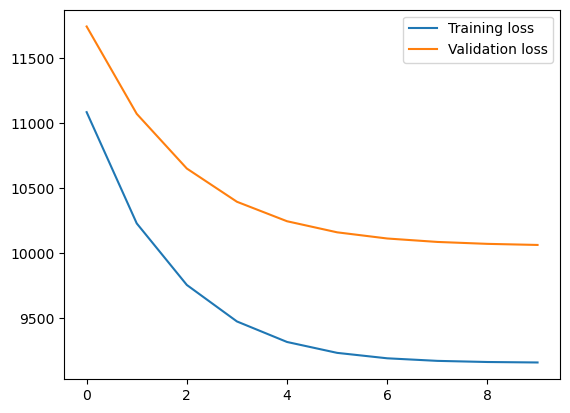

In [150]:
# plot the 'Training loss' & 'Validation loss'
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
#plt.rcParams["figure.figsize"] = (12.5,8.5)
plt.legend()

In [ ]:
# predicting close value using lSTM model
predictions = model.predict(test_generator)